<h1><center>Guide Notebook for the 380CT Assignment on TSP</center></h1>

_Kamal Bentahar_

[https://github.coventry.ac.uk/380CT-1920JANMAY/TSP-Guidance](https://github.coventry.ac.uk/380CT-1920JANMAY/TSP-Guidance)

# Notation and definitions

Let $G$ be a complete weighted graph with $n$ vertices...

- **Complete**: the graph is undirected, has no self-loops, and each node is connected to all the other vertices.
- **Weighted**: the edges have a weight (a positive integer).
- **Cycle**: a path that visits every vertex once, and goes back to the start point.
- **Total cost of the cycle**: sum of the edge weights of the cycle.

# Definition of the problem

Given $G$ as above, the versions of the TSP are defined as follows:

* **Decisional TSP (D-TSP)**:
> Given a total cost $k$, decide if $G$ is has a cycle of length $\leq k$.

    **NP-complete**, because D-TSP $\in$ NP and D-TSP $\leq_p$ HAMCYCLE.
    
    * D-TSP $\in$ NP: once a cycle is given (a certificate) we can quickly evaluate the its cost in $O(n)$ time to verify it is equal to $k$.
    * D-TSP $\leq_p$ HAMCYCLE: Reduction from HAMCYCLE (Hoos and Stutzler, p.25).

* **Search TSP**:
> Given a total cost $k$, search for a cycle of length $\leq k$ in $G$.
> (If found then return it, otherwise say that there is no such cycle.)
    
* **Optimization TSP**:
> Given $G$, find a cycle of minimal total cost.

    **NP-Hard**, because the optimization version of (decision) NP-complete problems are automatically NP-Hard. (using the same method sketched above for **Search TSP**)

The facts about the complexity classes memberships can also be found in (Garey and Johnson, 1979) and (Hoos and Stutzler, 2005).

# Testing methodology

* **Exact methods**:
    Average time for instances with increasing $n$.

* **Greedy and meta-heuristics**:
    Average "quality" as $n$ increases.


## Random instances sampling strategy

General TSP instances will be generated by creating symmetric adjacency matrices uniformly at random.

# Code

First start by importing relevant libraries.

In [6]:
from random import randint, choice
from pprint import pprint
from itertools import permutations # to generate all the possible cycle in the graph e.g. 123,321,132,231 etc...
from math import inf as oo # Infinity (∞) is larger than any number
from math import sqrt
from time      import time
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy  import arange

## Basics

Let the set of vertices be $\{0, 1, 2,\ldots, n-1\}$.

Without loss of generality, we can consider $0$ to be the start and end point of cycles.

In [9]:
MAX_DISTANCE = 100

def random_symmetric_graph(n):
    ''' Symmetric adjacency matrix of size nxn '''
    dist_matrix = [[oo for _ in range(n)] for _ in range(n)] # 2 dimensional array
    for i in range(n): #loop i 
        for j in range(i+1,n): #loop j
            v = randint(1,MAX_DISTANCE) #randomly generates distance from 1 to 100 maximum.
            dist_matrix[i][j] = v # both i and j have the same distance in the adjacency matrix - 2 dimensional array
            dist_matrix[j][i] = v
    return dist_matrix

def random_euclidean_graph(n):
    ''' Symmetric adjacency matrix of a Euclidean graph of size nxn '''
    dist_matrix = [[oo for _ in range(n)] for _ in range(n)]
    points = []
    for p in range(n):
        x,y = randint(0,MAX_DISTANCE), randint(0,MAX_DISTANCE)
        points.append((x,y))
    for i in range(n):
        p1 = points[i]
        for j in range(i+1,n):
            p2 = points[j]
            distance = sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
            dist_matrix[i][j] = distance
            dist_matrix[j][i] = distance
    return dist_matrix

def show(G):
    ''' Show adjacency matrix. Useful for debugging. '''
    n = len(G)
    r = "     "
    for i in range(n):
        r += f'{i:4}'
    r += '\n    -'+'-'*(4*n)+'\n'
    for i in range(n):
        r += f'{i:2} | '
        for j in range(n):
            r += f'{G[i][j]:4}'
        r += '\n'
    r = r.replace('inf', '  ∞')
    print(r)

def cost(G, cycle):
    ''' Calculate the cost of the given cycle '''
    c = 0
    n = len(G) # n is the number of vertices - cities 
    for i in range(n):
        len(cycle) == len(G)
        a = cycle[i]
        b = cycle[(i+1)%n] # modulo n is used to fetch number from the end of the list to bring back to zero.      
        c += G[a][b] #error
    return c

In [10]:
print(G, cycle)

NameError: name 'G' is not defined

### Example

In [11]:
G=random_symmetric_graph(4)
show(G)

        0   1   2   3
    -----------------
 0 |    ∞  26  23  13
 1 |   26   ∞   6  90
 2 |   23   6   ∞  57
 3 |   13  90  57   ∞



In [13]:
G=random_euclidean_graph(4)
show(G)

        0   1   2   3
    -----------------
 0 |    ∞26.9258240356725276.0591874792256734.713109915419565
 1 | 26.92582403567252   ∞69.5701085237043516.1245154965971
 2 | 76.0591874792256769.57010852370435   ∞53.85164807134504
 3 | 34.71310991541956516.124515496597153.85164807134504   ∞



# Solution methods

## Exact methods - Exhaustive search

The idea is to:
- Consider vertex $0$ as the start and end point.
- Iterate over all permutations of the vertices $\{1,2,\ldots, n-1\}$.
    -  Calculate cost of each permutation and keep track of minimum cost permutation.
- Return the cycle with minimum cost.

More formally, the pseudo-code is as follows:

**Input**: $G$.

**Output**: a cycle in $G$ of shortest cost.

1. $bestcycle\gets \emptyset$
2. $bestcost\gets \infty$
3. **for all** possible cycles $p$ in $G$ (starting and ending at $0$) **do**
4. $\quad$ $c\gets$ cost of $p$
2. $\quad$ **if** $c<bestcost$ **then**
3. $\qquad$ $bestcycle\gets p$
3. $\qquad$ $bestcost\gets c$
4. $\quad$ **end if**
5. **end for**
6. **return** $bestcycle, bestcost$

There are $(n-1)!$ possible cycles, and each computation of a cycle's cost costs $O(n)$. So this algorithm costs $$O((n-1)!\cdot n)=O(n!).$$

In [14]:
def exhaustive_search(G):
    n = len(G) # n is the number of vertices - cities 
    best_cost = oo # infinity
    best_cycle = []
    for cycle in permutations(range(1,n)): # permutations of [1,2,...,n-1] = means in factorial (n-1)!
        cycle=[0]+list(cycle)              # add the starting city: 0
        c = cost(G, cycle)
        if c < best_cost:
            best_cost = c
            best_cycle = cycle
    return (best_cycle, best_cost)

## Testing exhaustive search time cost

Test completely random graphs:

In [16]:
pnts_n_exhaustive = [] # the size of the graph
pnts_t_exhaustive = [] # the time it takes to solve that problem

n  = 8
t0 = t1 = 0

while t1-t0<100: # in seconds; if it takes too long then stop testing
    G = random_symmetric_graph(n)
    t0 = time()
    exhaustive_search(G)
    t1 = time()
    # record time
    print( f"{n}\t{t1-t0}" )
    pnts_n_exhaustive.append( n )
    pnts_t_exhaustive.append( t1-t0 )
    n += 1

8	0.02155303955078125
9	0.24652814865112305
10	2.8763298988342285
11	29.12720775604248
12	318.6206259727478


Let us plot this data to see it visually.

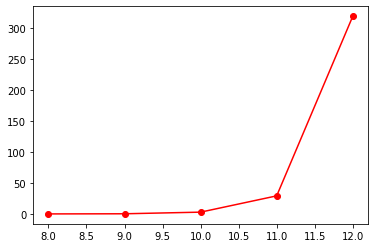

In [17]:
plt.plot(pnts_n_exhaustive, pnts_t_exhaustive, 'ro-')
plt.show()

Let us see if the emperical times match the theoretical $O(n!)$ expectation.

`pnts_t[i]` contains the time for `pnts_n[i]`, so we expect $\text{pnts_t[i]} \approx \text{pnts_n[i]}!$.
Hence, we must have

$$
\frac{\text{pnts_t[i]}}{\text{pnts_t[i-1]}} \approx \frac{i!}{(i-1)!} = i.
$$

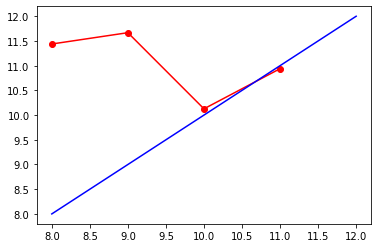

In [19]:
pnts_ratios = [pnts_t_exhaustive[i]/pnts_t_exhaustive[i-1] for i in range(1,len(pnts_n_exhaustive))]
plt.plot(pnts_n_exhaustive[:-1], pnts_ratios, 'ro-')
plt.plot(pnts_n_exhaustive,pnts_n_exhaustive,'b-') # theoretical ratios
plt.show()

In [20]:
#Testing large problem size n > 10 for exhaustive search

pnts_n_exhaustive = [] # the size of the graph
pnts_t_exhaustive = [] # the time it takes to solve that problem

n  = 8
t0 = t1 = 0

while t1-t0<100: # in seconds; if it takes too long then stop testing
    G = random_euclidean_graph(n)
    t0 = time()
    exhaustive_search(G)
    t1 = time()
    # record time
    print( f"{n}\t{t1-t0}" )
    pnts_n_exhaustive.append( n )
    pnts_t_exhaustive.append( t1-t0 )
    n += 1

8	0.022466659545898438
9	0.25251126289367676
10	2.5793590545654297
11	24.56506371498108
12	198.42922520637512


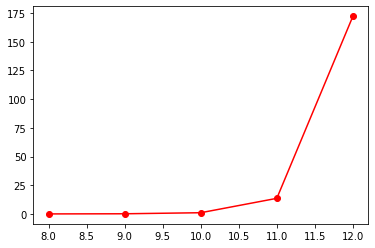

In [12]:
plt.plot(pnts_n_exhaustive, pnts_t_exhaustive, 'ro-')
plt.show()

In [46]:
#Testing small problem size n < 20 for exhaustive search

pnts_n_exhaustive_small = [] # the size of the graph
pnts_t_exhaustive_small = [] # the time it takes to solve that problem

n  = 1
t0 = t1 = 0

while t1-t0<1: # in seconds; if it takes too long then stop testing
    G = random_euclidean_graph(n)
    t0 = time()
    exhaustive_search(G)
    t1 = time()
    # record time
    print( f"{n}\t{t1-t0}" )
    pnts_n_exhaustive_small.append( n )
    pnts_t_exhaustive_small.append( t1-t0 )
    n += 1

1	0.0
2	0.0
3	0.0
4	0.0
5	0.0
6	0.0
7	0.004000663757324219
8	0.016138076782226562
9	0.17040467262268066
10	1.1326711177825928


### Discussion

* Exhaustive search exhibits combinatorial running time $O(n!)$:
* So it is only useful/possible when $n$ is small, up to about 13 on the current machine if it needs to finish within an hour.

# Approximation

## Greedy search

##### Nearest neigbours

In [21]:
def greedy_nearest_neighbours(G):
    H = copy.deepcopy(G) # We need the original G. We work on/modify H
    n = len(H) # number of cities 
    cities = list(range(n)) #listing cities [0,1,2 ...,n-1]
    cycle = [] # solution to be built
    city = 0 # Start city/vertex or visited
    while len(cities)>0: # A city is searched as long it is not empty - onced a city is visited it moves to another starting from 0,1,2 etc...
        # Find nearest neighbour
        city_neighbours = H[city]
        smallest_distance = min(city_neighbours)
        nearest_city = city_neighbours.index(smallest_distance)
        # Update 'cycle' and 'cities' and H then 'city'
        cycle.append(city)
        cities.remove(city)
        for i in range(n): # 'city' is not to be used again!
            H[city][i] = oo
            H[i][city] = oo
        city = nearest_city
    return (cycle, cost(G, cycle))

The while-loop costs $O(n)$, and the nested for-loop within it also costs $O(n)$, while the rest can be assumed to cost $O(1)$.
So the total cost of this greedy approach is $O(n)\times O(n) = O(n^2)$.

### Example

In [22]:
G=random_symmetric_graph(4)
show(G)
greedy_nearest_neighbours(G)

        0   1   2   3
    -----------------
 0 |    ∞  72 100  48
 1 |   72   ∞  45  46
 2 |  100  45   ∞  54
 3 |   48  46  54   ∞



([0, 3, 1, 2], 239)

In [23]:
G=random_euclidean_graph(4)
show(G)
greedy_nearest_neighbours(G)

        0   1   2   3
    -----------------
 0 |    ∞38.4707681233426927.8028775489156958.52349955359813
 1 | 38.47076812334269   ∞64.8151216923952141.340053217188775
 2 | 27.8028775489156964.81512169239521   ∞73.17103251970687
 3 | 58.5234995535981341.34005321718877573.17103251970687   ∞



([0, 2, 1, 3], 192.4815520120978)

### Test time and quality cost

We will initially estimate the "quality" simply by comparing the length of the cycle found by the greed approach to the "average length of a random cycle".

The average length of a random cycle is estimated to be the average length of a graph edge multiplied by the number of edges, i.e.

$$\frac{\text{MAX_DISTANCE}}{2} \times n.$$

In [24]:
MAX_REPETITIONS = 500

pnts_n = [] 
pnts_t = []
pnts_q = []

n = 5 # 5 vertices in a graph 
t = 0

while t<10: # in seconds; if it takes too long then stop testing
    t = 0
    expected_cycle_length = (MAX_DISTANCE/2)*n # TODO: Better estimate?
    sum_of_distances = 0
    for repetitions in range(MAX_REPETITIONS):
        G = random_symmetric_graph(n)
        t0 = time()
        cycle, length = greedy_nearest_neighbours(G)
        t1 = time()
        sum_of_distances += length
        t += t1-t0
    # record time and quality
    q = (sum_of_distances/MAX_REPETITIONS)/expected_cycle_length
    pnts_n.append( n )
    pnts_t.append( t )
    pnts_q.append( q )
    print( f"{n}\t{t}\t{q}" )
    n += 10

5	0.024926424026489258	0.748408
15	0.14301609992980957	0.38798133333333334
25	0.30822110176086426	0.2778448
35	0.538764476776123	0.219528
45	0.9057328701019287	0.18497777777777777
55	1.294839859008789	0.15974327272727273
65	1.822889804840088	0.14172246153846155
75	2.575364828109741	0.12813386666666668
85	3.1864969730377197	0.11611388235294118
95	4.55517578125	0.10816631578947368
105	7.177707195281982	0.1017912380952381
115	10.15028691291809	0.09508765217391305


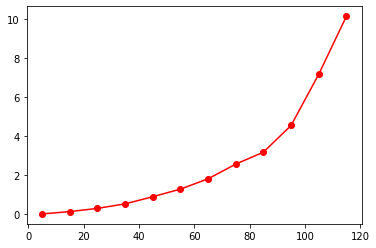

In [25]:
plt.plot(pnts_n, pnts_t, 'ro-')
plt.show()

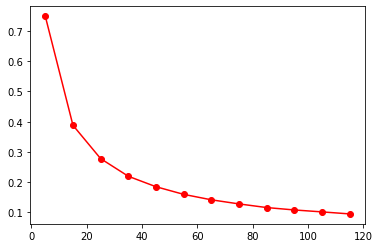

In [26]:
plt.plot(pnts_n, pnts_q, 'ro-')
plt.show()

In [27]:
#Testing large problem size n > 100 for greedy search

MAX_REPETITIONS = 500

pnts_n_greedy = []
pnts_t_greedy = []
pnts_q_greedy = []

n = 10
t = 0

while t<20: # in seconds; if it takes too long then stop testing
    t = 0
    expected_cycle_length = 0.708*sqrt(n)# TODO: Better estimate?
    sum_of_distances = 0
    for repetitions in range(MAX_REPETITIONS):
        G = random_euclidean_graph(n)
        t0 = time()
        cycle, length = greedy_nearest_neighbours(G)
        t1 = time()
        sum_of_distances += length
        t += t1-t0
    # record time and quality
    q = (sum_of_distances/MAX_REPETITIONS)/expected_cycle_length
    pnts_n_greedy.append( n )
    pnts_t_greedy.append( t )
    pnts_q_greedy.append( q )
    print( f"{n}\t{t}\t{q}" ) # prints number of cities, the time, and quality cost
    n += 5

10	0.08197164535522461	142.89433071213352
15	0.10914301872253418	143.55150581149056
20	0.26714444160461426	142.05909959229294
25	0.37221240997314453	144.46470745086444
30	0.5685060024261475	141.81494072740895
35	0.8231446743011475	143.10119792102464
40	0.9862759113311768	141.60192296218045
45	1.1335272789001465	141.41909184965857
50	1.4749503135681152	139.9076943932828
55	1.6939165592193604	140.02683800343507
60	2.311413288116455	140.48341363227522
65	2.399649143218994	139.72782062246785
70	2.691310167312622	139.56479722606994
75	3.2051239013671875	139.33121113449465
80	3.783432960510254	138.707884902334
85	4.1153106689453125	138.48077845585962
90	4.582174777984619	138.6664740403136
95	4.255842447280884	138.90050420123214
100	4.849246025085449	138.35910145954531
105	4.727308988571167	138.85228311864267
110	5.7743260860443115	138.76881370621962
115	6.626211881637573	137.37442331600693
120	7.334322214126587	137.31991867659733
125	7.824549436569214	137.61756090839742
130	8.157026529312134

In [45]:
#Testing small problem size n < 10 for greedy search

MAX_REPETITIONS = 500

pnts_n_greedy_small = []
pnts_t_greedy_small = []
pnts_q_greedy_small = []

n = 1
t = 0

while t<1: # in seconds; if it takes too long then stop testing
    t = 0
    expected_cycle_length = 0.708*sqrt(n)# TODO: Better estimate?
    sum_of_distances = 0
    for repetitions in range(MAX_REPETITIONS):
        G = random_euclidean_graph(n)
        t0 = time()
        cycle, length = greedy_nearest_neighbours(G)
        t1 = time()
        sum_of_distances += length
        t += t1-t0
    # record time and quality
    q = (sum_of_distances/MAX_REPETITIONS)/expected_cycle_length
    pnts_n_greedy_small.append( n )
    pnts_t_greedy_small.append( t )
    pnts_q_greedy_small.append( q )
    print( f"{n}\t{t}\t{q}" ) # prints number of cities, the time, and quality cost
    n += 1

1	0.0020971298217773438	inf
2	0.00634312629699707	107.45845677349627
3	0.005373477935791016	128.6825023153748
4	0.015460968017578125	139.44713011709322
5	0.012018680572509766	140.61923195230813
6	0.04207921028137207	143.54618990755736
7	0.02400374412536621	142.94292592231238
8	0.043977975845336914	142.3995993199623
9	0.051981449127197266	143.7955727839294
10	0.03207063674926758	142.8092449511886
11	0.03599739074707031	140.98932321298798
12	0.04800009727478027	144.06586720400355
13	0.07811641693115234	143.08513314753395
14	0.09061717987060547	142.08578367775814
15	0.13054561614990234	142.95234255474926
16	0.09865999221801758	144.33935791675594
17	0.15082931518554688	142.31722145240585
18	0.13328027725219727	143.2221529782434
19	0.1355760097503662	142.62105009451142
20	0.1266179084777832	143.3717333104178
21	0.14390110969543457	144.1912272400321
22	0.22739005088806152	142.91122467528243
23	0.2077348232269287	142.86002163222932
24	0.19692683219909668	143.46368729021623
25	0.24892973899841

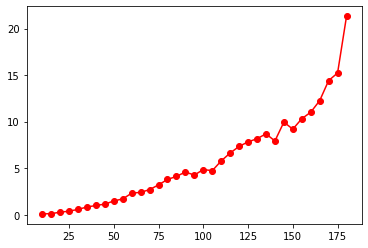

In [28]:
plt.plot(pnts_n_greedy, pnts_t_greedy, 'ro-')
plt.show()

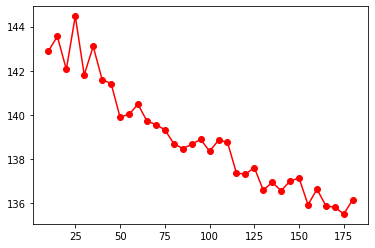

In [30]:
plt.plot(pnts_n_greedy, pnts_q_greedy, 'ro-')
plt.plot()
plt.show()

## Metaheuristics

............................................................

............................................................

............................................................

............................................................

............................................................


# References

* Garey, S. and Johnson, D. (1979)
**Computers and Intractability: A Guide to the Theory of NP-Completeness.**
Freeman.

* Hoos, H. and Stutzler, T. (2005)
**Stochastic Local Search: Foundations and Applications.**
Morgan Kaufmann.

* Sipser, M. (2013).
**Introduction to the theory of computation**
(3rd international ed.). Cengage Learning.

## Introduction

This report presents findings from a computational study conducted on the travelling salesman problem. We evaluate the performance of genetic algorithms and iterative improvement metaheuristic for optimization of the TSP problem.

## Methodology

## Iterative improvement meta-heuristic - Best fit strategy for two-opt local search

## Pseudocode and Explanation

## Time Complexity

## Implementation

In [31]:
#(Diniz, 2017)

def two_opt(G, cycle):
    best_solution = cost(G, cycle)
    improved = True
    n = len(cycle)
    while improved:
        improved = False
        for i in range(1, n-2):
            for j in range(i+1, n):
                if j-i == 1: continue
                new_route = cycle[:]
                new_route[i:j] = cycle[j-1:i-1:-1] # this is the 2-opt Swap
                if cost(G, new_route) < best_solution: #getting the cost 
                    best_solution = cost(G, new_route) 
                    cycle = new_route
                    improved = True    
        #cycle = best_solution
    return best_solution

In [32]:
G=random_euclidean_graph(20)
#show(G)
cycle, length = greedy_nearest_neighbours(G)
s = two_opt(G, cycle)
print(cycle, length, s)
print("printing the minimal cost for Greedy search and iterative improvement")

[0, 7, 17, 12, 6, 1, 2, 8, 13, 9, 11, 14, 18, 15, 10, 19, 16, 3, 5, 4] 493.7158225010812 442.3534856805173
printing the minimal cost for Greedy search and iterative improvement


In [35]:
#Testing large problem size n > 100 for iterative meta-heuristic 

MAX_REPETITIONS = 500

pnts_n= []
pnts_t= []
pnts_q= []
pnts_r= []

n = 10
t = 0

while t<350: # in seconds; if it takes too long then stop testing
    t = 0
    expected_cycle_length = 0.7080*sqrt(n) # TODO: Better estimate?
    sum_of_distances = 0
    for repetitions in range(MAX_REPETITIONS):
        G = random_euclidean_graph(n)
        cycle, length_greedy = greedy_nearest_neighbours(G)
        t0 = time()
        length = two_opt(G, cycle)  
        t1 = time()
        sum_of_distances += length
        t += t1-t0
        r = (np.mean(length/length_greedy)*100) # The average score (%) of tour length
    # record time and quality
    q = (sum_of_distances/MAX_REPETITIONS)/expected_cycle_length
    pnts_n.append( n )
    pnts_t.append( t )
    pnts_q.append( q )
    pnts_r.append( r )
    print( f"{n}\t{t}\t{q}\t{r}" ) # prints number of cities, the time, and quality cost
    n += 5

10	0.1520547866821289	139.00594864524604	95.07695816612178
15	0.5557029247283936	134.85953560057095	98.32654375581623
20	1.419093370437622	134.00973221412508	97.88359990505086
25	4.5240278244018555	132.99306568689394	92.49339916256368
30	9.447439193725586	133.10460084509884	97.81770060202624
35	13.017014741897583	131.11146666856854	87.10691166704491
40	19.88613772392273	129.61452776073696	97.37685071145445
45	29.081979036331177	129.2995245523183	93.6380063610303
50	43.96538209915161	128.00076422015343	78.91110810481464
55	57.07853364944458	127.30939783886943	87.51288536616771
60	78.26466035842896	127.18166679729498	87.58983027796613
65	97.09619855880737	126.17952357014302	91.82153189942261
70	132.98590803146362	126.68815086153768	84.1314606171867
75	166.04052090644836	125.90649875892589	89.56353067400347
80	197.01456451416016	125.53674382603504	85.87679806162308
85	234.24791073799133	125.01860758064693	84.64306315866563
90	333.2365372180939	124.89784480975113	92.19046766285271
95	334.9

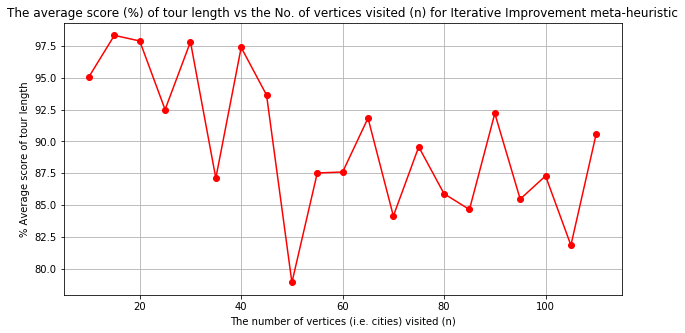

In [37]:
#large problem size - the average score (%) of tour length 
plt.figure(figsize=(10,5))
plt.plot(pnts_n, pnts_r, 'ro-')
plt.ylabel('% Average score of tour length')
plt.xlabel('The number of vertices (i.e. cities) visited (n)')
plt.title('The average score (%) of tour length vs the No. of vertices visited (n) for Iterative Improvement meta-heuristic')
plt.grid()
plt.show()

In [43]:
#Testing small problems size n < 20 for iterative meta-heuristic 
MAX_REPETITIONS = 500

pnts_n_2opt_small = []
pnts_t_2opt_small = []
pnts_q_2opt_small = []
pnts_r_2opt_small = []

n = 1
t = 0

while t<1: # in seconds; if it takes too long then stop testing
    t = 0
    expected_cycle_length = 0.7080*sqrt(n) # TODO: Better estimate?
    sum_of_distances = 0
    for repetitions in range(MAX_REPETITIONS):
        G = random_euclidean_graph(n)
        cycle, length_greedy = greedy_nearest_neighbours(G)
        t0 = time()
        length = two_opt(G, cycle)  
        t1 = time()
        sum_of_distances += length
        t += t1-t0
        r = (np.mean(length/length_greedy)*100) # The average score (%) of tour length
    # record time and quality
    q = (sum_of_distances/MAX_REPETITIONS)/expected_cycle_length
    pnts_n_2opt_small.append( n )
    pnts_t_2opt_small.append( t )
    pnts_q_2opt_small.append( q )
    pnts_r_2opt_small.append( r )
    print( f"{n}\t{t}\t{q}\t{r}" ) # prints number of cities, the time, and quality cost
    n += 1

1	0.0009963512420654297	inf	nan
2	0.0010256767272949219	105.61003649024322	100.0
3	0.0035271644592285156	131.5751332118988	100.0
4	0.0049326419830322266	137.1504187528468	100.0
5	0.007017612457275391	139.61704634650286	100.0
6	0.009175777435302734	138.53786647539627	80.53853998191472
7	0.023410797119140625	139.80077232707126	100.0
8	0.03590869903564453	138.54546806069519	100.0
9	0.058972835540771484	137.84373323358352	94.53749441265114
10	0.14674782752990723	138.38938103645506	86.23450951376574
11	0.10204315185546875	138.20928195357342	100.0
12	0.17858624458312988	136.72382604099283	96.89973620399948
13	0.2158043384552002	136.0025315963457	89.7338390220726
14	0.25850844383239746	135.31290124280494	94.99646902216313
15	0.48468780517578125	136.07796336514812	95.52989669083529
16	0.7387094497680664	135.14185726949773	100.0
17	0.7293245792388916	134.86973703018305	88.92600604273342
18	0.8656527996063232	134.16033313844304	88.90984530634553
19	1.1424577236175537	133.4388220828073	100.0


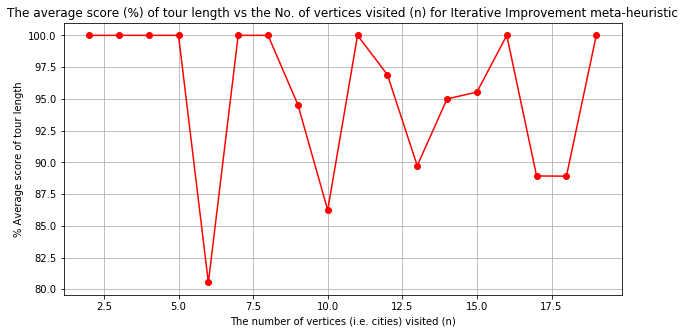

In [44]:
#Small problem size - the average score (%) of tour length 
plt.figure(figsize=(10,5))
plt.plot(pnts_n_2opt_small, pnts_r_2opt_small, 'ro-')
plt.ylabel('% Average score of tour length')
plt.xlabel('The number of vertices (i.e. cities) visited (n)')
plt.title('The average score (%) of tour length vs the No. of vertices visited (n) for Iterative Improvement meta-heuristic')
plt.grid()
plt.show()

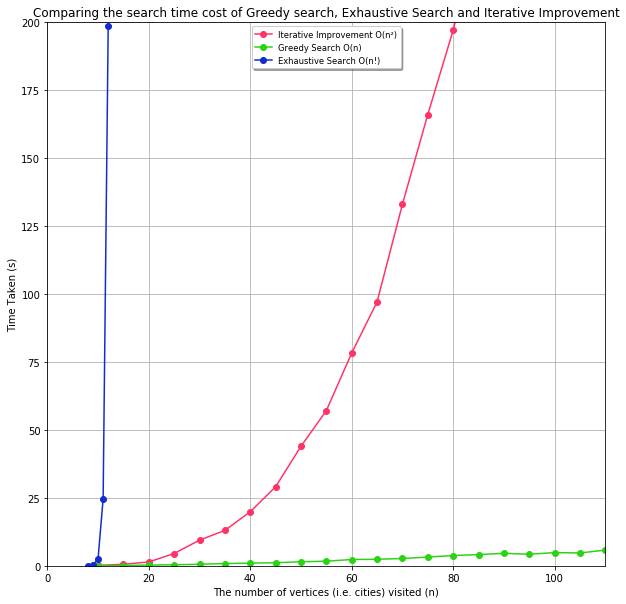

In [41]:
#Large problem size - time taken
plt.figure(figsize=(10,10))
plt.plot(pnts_n, pnts_t, 'ro-', label ='Iterative Improvement O(n²)', color="#FF3367")
plt.plot(pnts_n_greedy, pnts_t_greedy, 'ro-', label='Greedy Search O(n)',color="#2BD314FF" )
plt.plot(pnts_n_exhaustive, pnts_t_exhaustive, 'ro-', label='Exhaustive Search O(n!)', color="#142BD3FF")
plt.legend(loc='upper center', shadow=True, fontsize = 'small') 
ax = plt.gca()
ax.set_xlim([0, 110])
ax.set_ylim([0, 200])
plt.ylabel('Time Taken (s)')
plt.xlabel('The number of vertices (i.e. cities) visited (n)')
plt.title('Comparing the search time cost of Greedy search, Exhaustive Search and Iterative Improvement')
plt.grid()
plt.show()

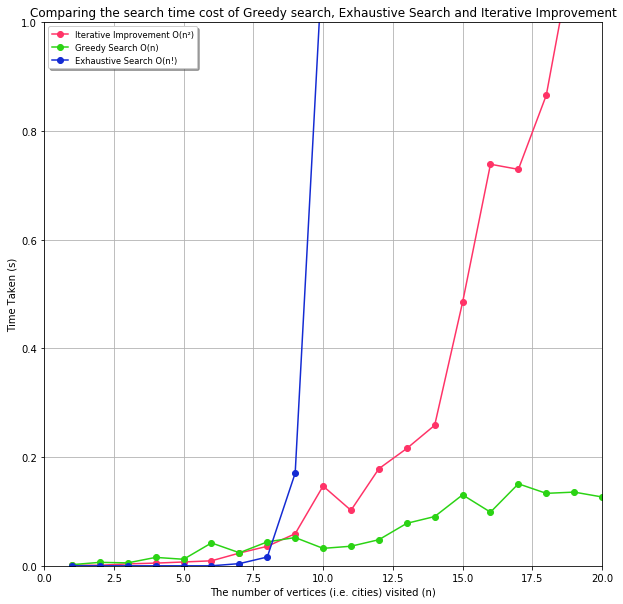

In [60]:
#Small problem size - time taken
plt.figure(figsize=(10,10))
plt.plot(pnts_n_2opt_small, pnts_t_2opt_small, 'ro-', label ='Iterative Improvement O(n²)', color="#FF3367")
plt.plot(pnts_n_greedy_small, pnts_t_greedy_small, 'ro-', label='Greedy Search O(n)',color="#2BD314FF" )
plt.plot(pnts_n_exhaustive_small, pnts_t_exhaustive_small, 'ro-', label='Exhaustive Search O(n!)', color="#142BD3FF")
plt.legend(loc='upper left', shadow=True, fontsize = 'small') 
ax = plt.gca()
ax.set_xlim([0, 20])
ax.set_ylim([0, 1])
plt.ylabel('Time Taken (s)')
plt.xlabel('The number of vertices (i.e. cities) visited (n)')
plt.title('Comparing the search time cost of Greedy search, Exhaustive Search and Iterative Improvement')
plt.grid()
plt.show()

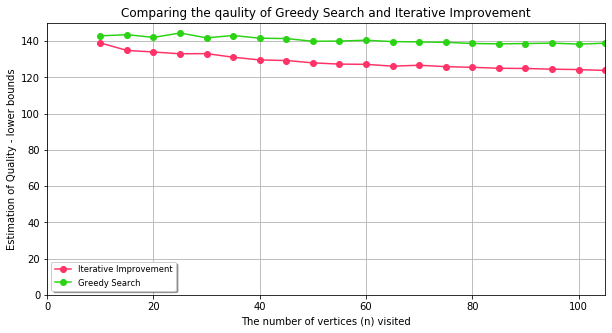

In [40]:
#large problem size - measuring quality
plt.figure(figsize=(10,5))
plt.plot(pnts_n, pnts_q, 'ro-', label ='Iterative Improvement', color="#FF3367")
plt.plot(pnts_n_greedy, pnts_q_greedy, 'ro-', label='Greedy Search',color="#2BD314FF" )
plt.legend(loc='best', shadow=True, fontsize = 'small') 
ax = plt.gca()
ax.set_xlim([0, 105])
ax.set_ylim([0, 150])
plt.ylabel('Estimation of Quality - lower bounds') #lower bounds
plt.xlabel('The number of vertices (n) visited')
plt.title('Comparing the qaulity of Greedy Search and Iterative Improvement')
plt.grid()
plt.show()

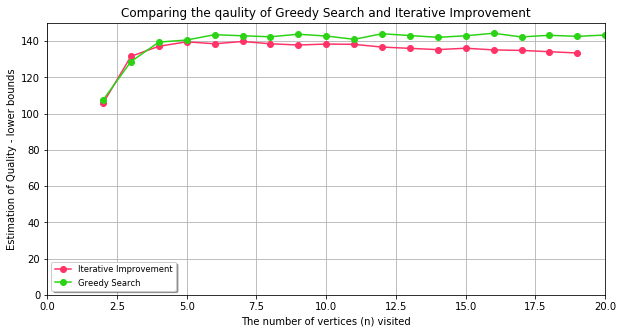

In [58]:
#Small problem size - measuring quality
plt.figure(figsize=(10,5))
plt.plot(pnts_n_2opt_small, pnts_q_2opt_small, 'ro-', label ='Iterative Improvement', color="#FF3367")
plt.plot(pnts_n_greedy_small, pnts_q_greedy_small, 'ro-', label='Greedy Search',color="#2BD314FF" )
plt.legend(loc='best', shadow=True, fontsize = 'small') 
ax = plt.gca()
ax.set_xlim([0, 20])
ax.set_ylim([0, 150])
plt.ylabel('Estimation of Quality - lower bounds') #lower bounds
plt.xlabel('The number of vertices (n) visited')
plt.title('Comparing the qaulity of Greedy Search and Iterative Improvement')
plt.grid()
plt.show()

## References